# 3 Regressão Logística

In [10]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline

from aprendizado_maquina import regressao_logistica as lg

Carregando os dados do dataset e armazendo em um array.
Em seguida damos uma rápida visualizada nos dados

In [2]:
data = pd.read_csv('data/ex2data1.txt', header=None, names=['Prova 1', 'Prova 2', 'Aprovado'])  
data.head()

,Prova 1,Prova 2,Aprovado
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


A primeira coluna , será preenchida com numeros 1, represenhta o theta0

In [3]:
data.insert(0, 'Ones', 1)

In [4]:
# converte de dataframes para arrays
cols = data.shape[1]  
X = data.iloc[:,0:cols-1]  
y = data.iloc[:,cols-1:cols]

# converte de arrays para matrizes
X = np.array(X.values)  
y = np.array(y.values)  
theta = np.zeros(3)

## 3.1 Visualização dos dados

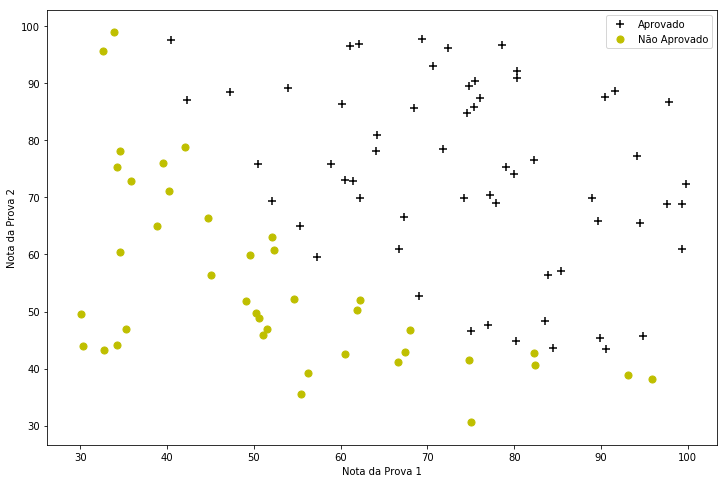

In [5]:
#gerando o gráfico de dispersão
#para analise preliminar dos dados

positivo = data[data['Aprovado'].isin([1])]  
negativo = data[data['Aprovado'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(positivo['Prova 1'], positivo['Prova 2'], s=50, c='k', marker='+', label='Aprovado')  
ax.scatter(negativo['Prova 1'], negativo['Prova 2'], s=50, c='y', marker='o', label='Não Aprovado')  
ax.legend()  
ax.set_xlabel('Nota da Prova 1')  
ax.set_ylabel('Nota da Prova 2')  

### 3.2.2 Função de custo e gradiente

In [11]:
lg.custo_regressao_logistica(theta, X, y)

0.69314718055994529

### 3.2.3 Aprendizado de Parametros

Para esta tarefa utilizei a função fmin_tnc do sckit learn, essa funçao encontra os valores minimos para a função alvo,
no nosso caso o função **gradiente_descendente**

In [13]:
import scipy.optimize as opt  
result = opt.fmin_tnc(func=lg.custo_regressao_logistica, x0=theta.T, fprime=lg.gradiente_descendente_batch, args=(X, y))  
lg.custo_regressao_logistica(result[0], X, y)  

0.20349770158947472

 Prediz se **Aprovado** ou **Reprovado** com base nos valores 0 e 1 usando a função de aprendizado de parametros da regressao logistica

### 3.2.4 Avaliação do Modelo

In [17]:
def predizer(theta, X):
    probabilidade = lg.sigmoide(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probabilidade]

Calculando a probabilidade de um candidato com notas 45 e 85 na primeira e segunda avaliações, respectivamente.

In [18]:
theta_min = np.matrix(result[0])
x1 = np.array([[1.0,45.0,85.0]])
p = predizer(theta_min, x1)

probabilidade = lg.sigmoide(x1 * theta_min.T)
print("Probabilidade", probabilidade[0,0])

Probabilidade 0.776290623685


Avaliando a precisação do modelo. Executação a predição sobre

In [20]:
theta_min = np.matrix(result[0])  
predicoes = predizer(theta_min, X)  
corretas = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predicoes, y)]  
precisao = (sum(map(int, corretas)) % len(corretas))  
print('Precisão {0}%'.format(precisao))


Precisão 89%
